In [1]:
import numpy as np
from scipy.integrate import trapezoid
from scipy.integrate import cumulative_trapezoid as cumtrapz

from gw_lensing.utils.constants import *
from gw_lensing.lens_models import sis
from gw_lensing.optical_depth import sis_optical_depth as sistau

#PLOTTING MODULES
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSZ = 17
fontSz = 15
fontsz = 13
fontssz = 11

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

import sys
dir_base=sys.path[0]
dir_out=dir_base+"/plots_optical_depth/"

# Singular Isothermal Sphere (SIS)

The SIS is described by the velovity dispersion $\sigma$ of the lens that can be mapped to a given viralized mass of the halo (see Dodelson exercise 3.4).

The density is described by
\begin{equation}
\rho_{SIS}(r)=\frac{\sigma^2}{2\pi G r^2}\,,
\end{equation}
which diverges at $r\to 0$. 

We can define the halo as the region where the density is 200 times the critical density of the universe $\rho_c$, so that the mass enclosed in a spherical halo follows from its mean enclosed density at a volume of radius $r_{200}$:
\begin{equation}
\rho_{200}=200\rho_c=\frac{m_{200}}{4\pi r^{3}_{200}/3}.
\end{equation}
This can also be computed as the mass within a 3D radius
\begin{equation}
m_{200}=\int_{r<r_{200}}d^3r\rho_{SIS}(r)=\frac{2\sigma^2}{G}r_{200}\,,
\end{equation}
which also implies that the mass enclosed in the halo diverges at $r\to\infty$. 
From these expressions above one can see that
\begin{equation}
m_{200}=\frac{\sqrt{6}\sigma^3}{\sqrt{\pi G^{3}\rho_{200}}}\,.
\end{equation}
Inverting this relation we get
\begin{equation}
\sigma_v = \left(\frac{\sqrt{\pi G^3\rho_{200}}m_{200}}{\sqrt{6}}\right)^{1/3}\,.
\end{equation}
From here we can see that the Einstein radius
\begin{equation}
\theta_E = \frac{\sigma_v^2}{G\Sigma_{crit}D_L}=\frac{4\pi D_{SL}\sigma_v^2}{D_S c^2}\propto m_{200}^{2/3}
\end{equation}

Note that people also like to talk about the mass enclosed in a 2D radius and relate this to the surface density:
\begin{equation}
M(R)=2\pi\int dR\cdot R\Sigma(R)=\frac{\pi\sigma^2}{G}R
\end{equation}

We will use this connection between the mass and the velocity dispersion to compute the number density of lenses.

In [2]:
print('Velocity dispersion of M200=1e12 halo is =',sis.sigma_v(1e12,0)/1e3,' km/s')

Velocity dispersion of M200=1e12 halo is = 100.95100492508162  km/s


See also discussion in Sec. III [Çaliskan et al. 2023](https://arxiv.org/abs/2307.06990)

## Multiple image cross-section

We now compute the optical depth for multiple images. For the SIS model, the cross section for multiple images is defined as $\theta<\theta_E$ since there are always two images below this angle and only one above.

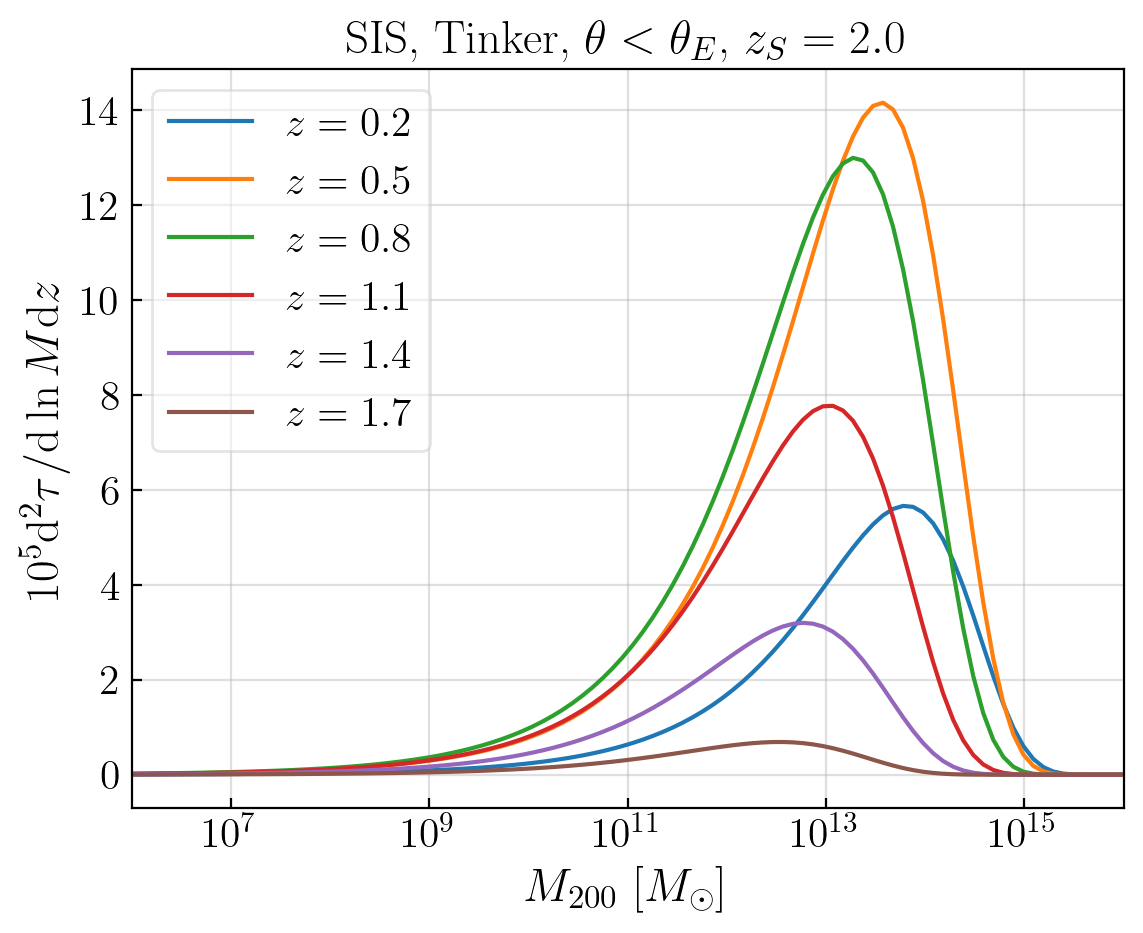

In [3]:
Ms = np.logspace(6,16,100)
nzs = 6
zs = np.linspace(0.2,1.7,nzs)
z_S = 2. #source redshift

for i in range(nzs):
    plt.semilogx(Ms,1e5*sistau.d2taudzdlnM(Ms,zs[i],z_S),label=r'$z=%s$' % np.round(zs[i],1))

plt.title(r'SIS, Tinker, $\theta<\theta_E$, $z_S=%s$' % z_S,fontsize=fontSZ)
plt.xlabel(r'$M_{200}$ [$M_\odot$]',fontsize=fontSZ)
plt.ylabel(r'$10^5\mathrm{d}^2\tau/\mathrm{d}\ln M\mathrm{d}z$',fontsize=fontSZ)

plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(Ms),max(Ms)])
#plt.savefig('ddtaudlnMdz_M.pdf', bbox_inches='tight', transparent=True)
plt.show()

tau at z= 100.0  is  0.00630984742296036


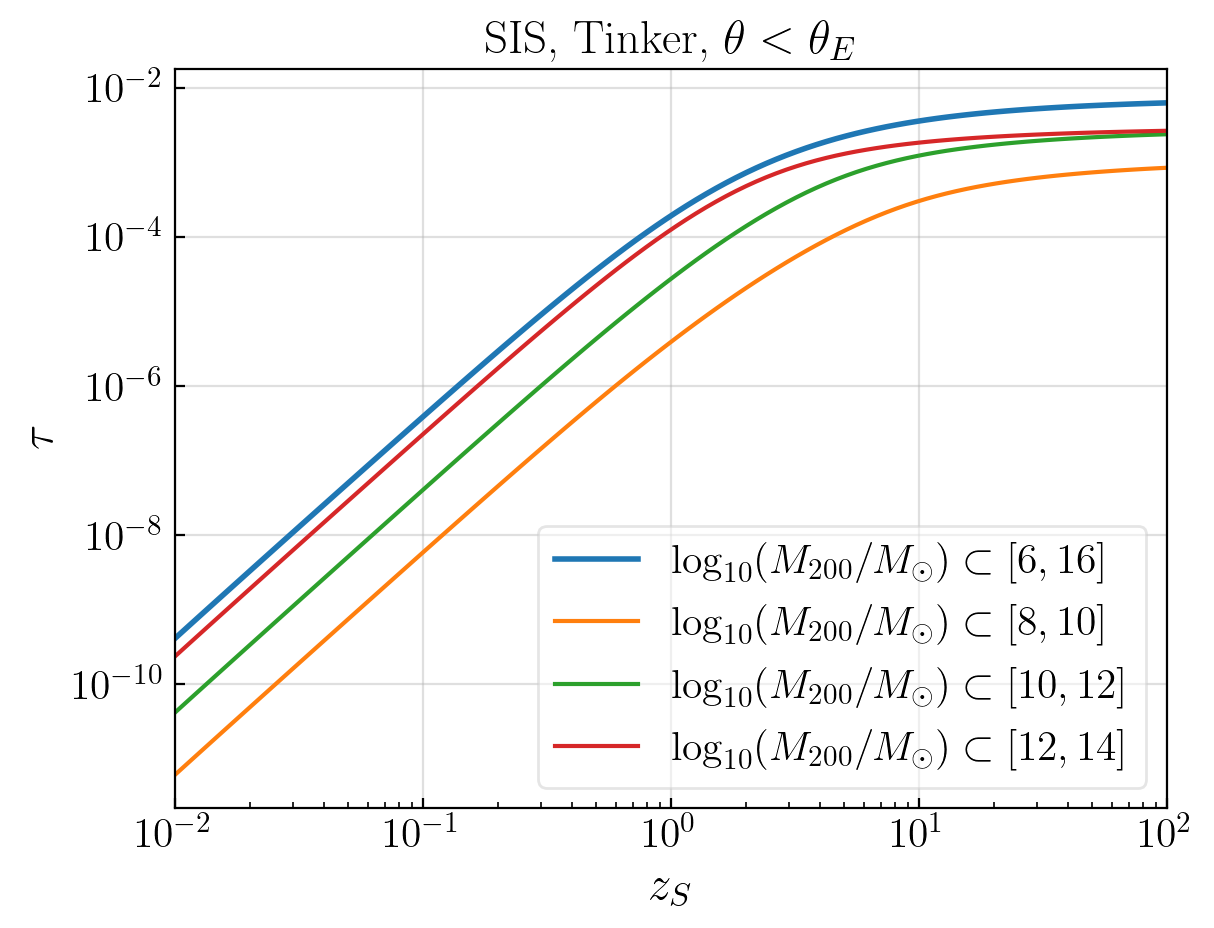

In [4]:
nzs = 100
z_Ss = np.logspace(-2,2,100)

log10Mmin,log10Mmax, nMs = 6, 16, 1000
tSIS_tot = sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs)
plt.loglog(z_Ss,tSIS_tot,lw=2,label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
print('tau at z=',z_Ss[-1],' is ',tSIS_tot[-1])
log10Mmin,log10Mmax, nMs = 8, 10, 1000
plt.loglog(z_Ss,sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 10, 12, 1000
plt.loglog(z_Ss,sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 12, 14, 1000
plt.loglog(z_Ss,sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))

#plt.axhline(1,min(z_Ss),max(z_Ss),ls='--',color='k')

plt.title(r'SIS, Tinker, $\theta<\theta_E$',fontsize=fontSZ)
plt.xlabel(r'$z_S$',fontsize=fontSZ)
plt.ylabel(r'$\tau$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(z_Ss),max(z_Ss)])
#plt.savefig('tau_zS.pdf', bbox_inches='tight', transparent=True)
plt.show()

Comparing to comoving volume

In [5]:
from astropy.cosmology import Planck18 as cosmo

tau at z= 158.48931924611142  is  0.006558818203427811


/Users/jmezquiaga/opt/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/numpy/ma/core.py:6957: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


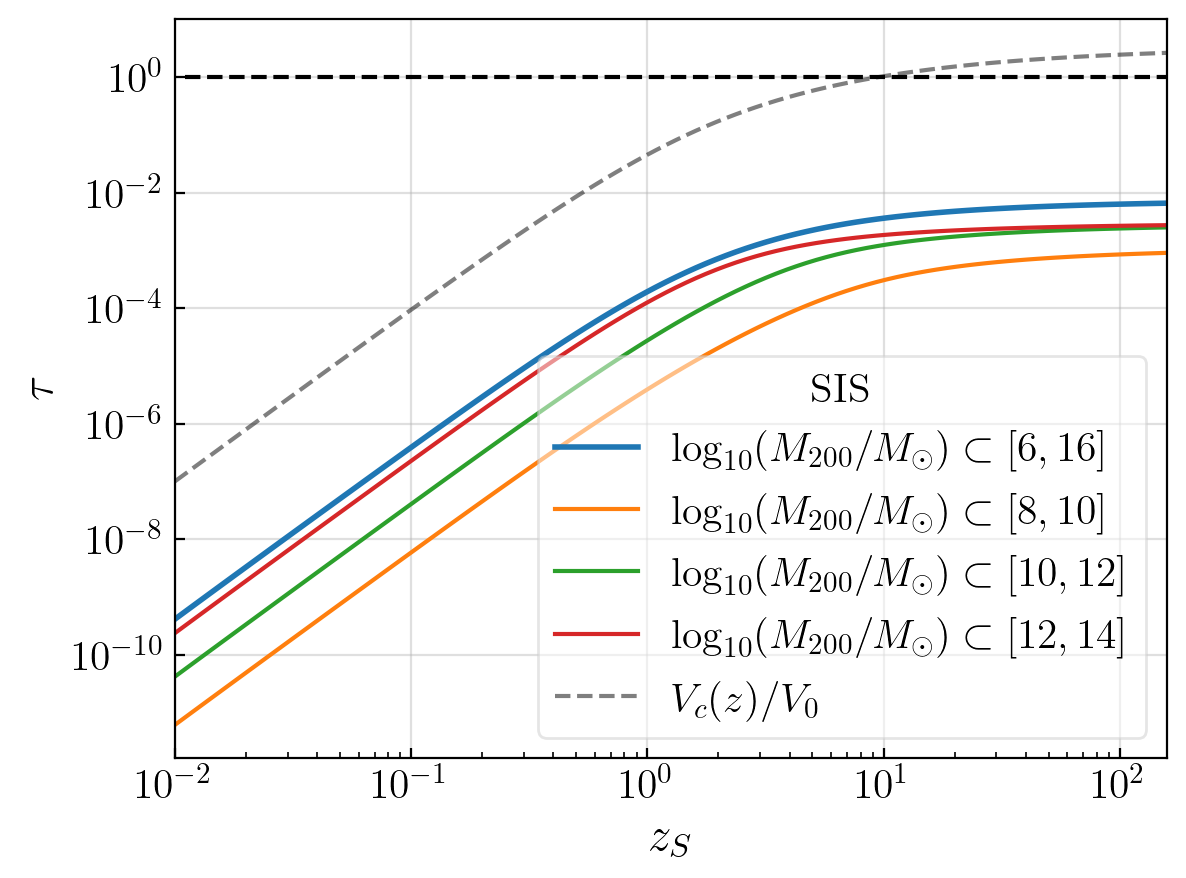

In [6]:
nzs = 100
nzs_plot = 100
z_Ss = np.logspace(-2,2.2,nzs_plot)

log10Mmin,log10Mmax, nMs = 6, 16, 1000
tSIS_tot = sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs)
plt.loglog(z_Ss,tSIS_tot,lw=2,label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
print('tau at z=',z_Ss[-1],' is ',tSIS_tot[-1])
log10Mmin,log10Mmax, nMs = 8, 10, 1000
plt.loglog(z_Ss,sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 10, 12, 1000
plt.loglog(z_Ss,sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 12, 14, 1000
plt.loglog(z_Ss,sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))

plt.plot(z_Ss,1e-7*cosmo.comoving_volume(z_Ss).value/cosmo.comoving_volume(1e-2).value,'k--',alpha=0.5,label=r'$V_c(z)/V_0$')

plt.axhline(1,min(z_Ss),max(z_Ss),ls='--',color='k')
plt.xlabel(r'$z_S$',fontsize=fontSZ)
plt.ylabel(r'$\tau$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title='SIS')#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(z_Ss),max(z_Ss)])
#plt.savefig(dir_out+'tau_zS.pdf', bbox_inches='tight', transparent=True)
plt.show()

Grid

In [7]:
ngrid = 100

z_S = 10

zLs = np.linspace(0.001,z_S,ngrid)
Ms = np.logspace(6,16,ngrid)

ZL, ML = np.meshgrid(zLs,Ms)

vd2taudzdlnM = np.vectorize(sistau.d2taudzdlnM)

d2TAUdlnMdZ = vd2taudzdlnM(ML,ZL,z_S)

tSIS_tot = sistau.tau(z_S,np.log10(np.min(Ms)),np.log10(np.max(Ms)),ngrid,ngrid)
print('Total optical depth at z = ',z_S,' is ',tSIS_tot)

Total optical depth at z =  10  is  0.003597700038615389


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


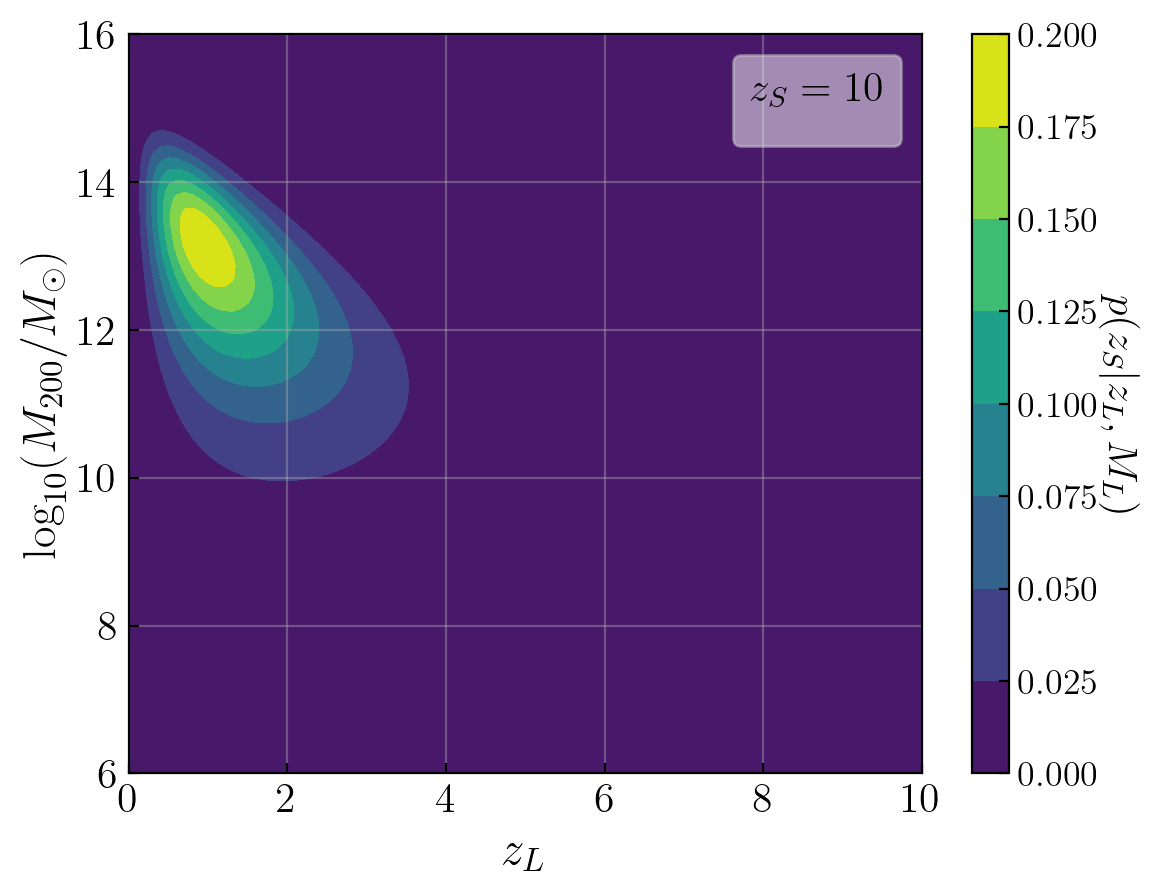

In [8]:
contour_f = plt.contourf(ZL,np.log10(ML),np.log(10)*d2TAUdlnMdZ/tSIS_tot)#,levels,locator=ticker.LogLocator()
#contour = plt.contour(ZL,np.log10(ML),d2TAUdlnMdZ)#,levels,locator=ticker.LogLocator()
#plt.clabel(contour,contour.levels,inline=1, fontsize=fontsz,colors='k')#,fmt=fmt

cbar = plt.colorbar(contour_f)#ticks = np.round(gammas/m_ref,2)
cbar.set_label(r'$p(z_S|z_L,M_L)$', rotation=270,labelpad=15,fontsize=fontSz)
cbar.ax.tick_params(direction='in',labelsize=fontsz)

plt.ylabel(r'$\log_{10}(M_{200}/M_\odot)$',fontsize=fontSZ)
plt.xlabel(r'$z_L$',fontsize=fontSZ)
#plt.xlabel(r'$10^3\mathrm{d}^2\tau/\mathrm{d}\ln M\mathrm{d}z$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title=r'$z_S=%s$' % z_S)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([0,10])
#plt.ylim([1e-4,5])
#plt.savefig(dir_out+'p_ddtaudlnMdz_contour_zS_%s.pdf' % z_S, bbox_inches='tight', transparent=True)
plt.show()

Most likely lens redshift

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


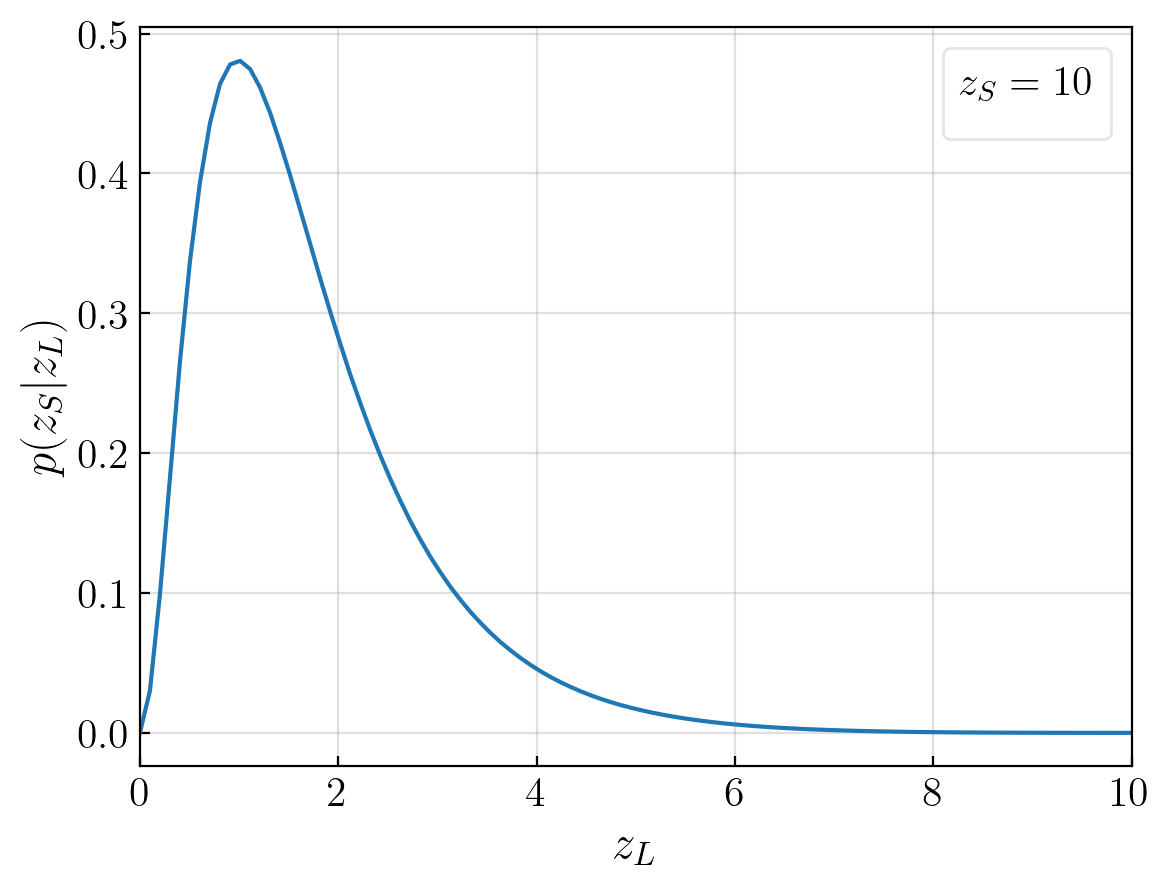

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


90% accumulated optical depth z =  0.405 - 3.94


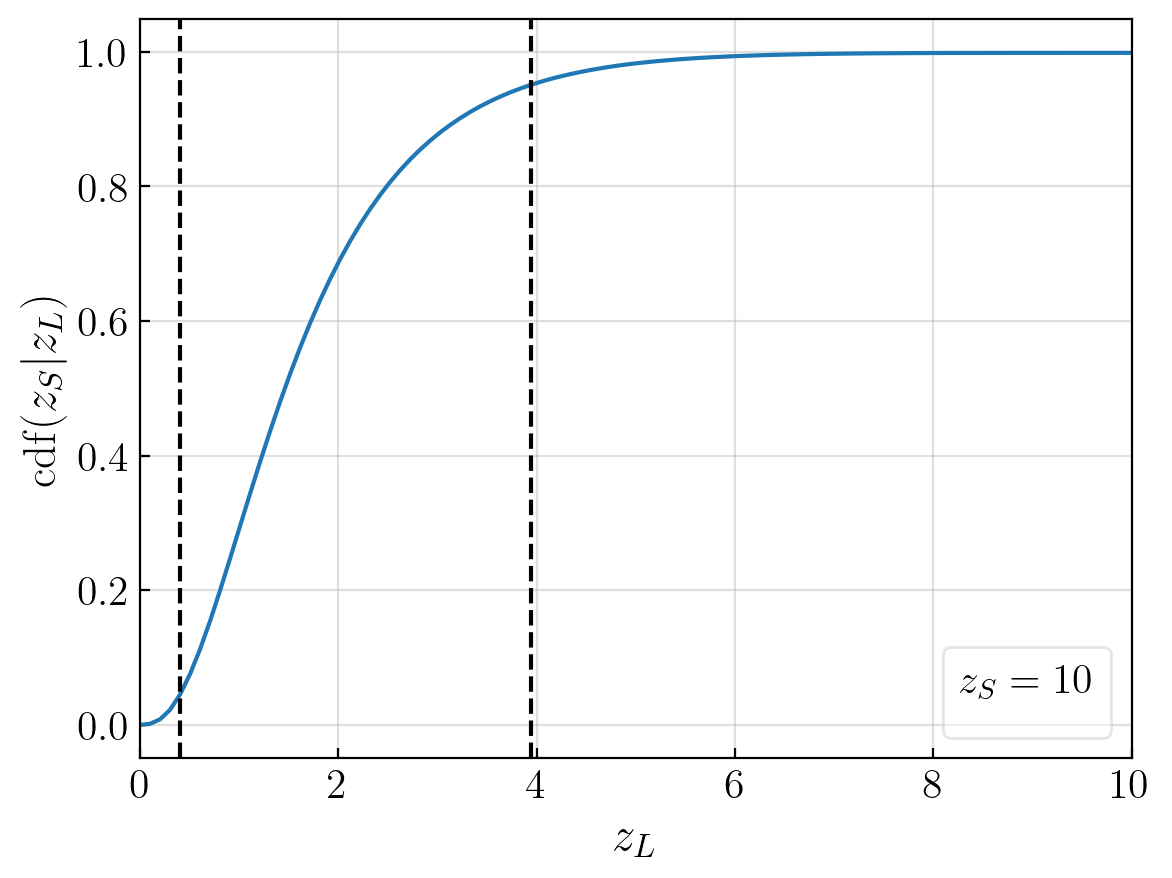

In [9]:
dtaudz = trapezoid(np.log(10)*d2TAUdlnMdZ/tSIS_tot,np.log10(Ms),axis=0)

plt.plot(zLs,dtaudz)


plt.ylabel(r'$p(z_S|z_L)$',fontsize=fontSZ)
plt.xlabel(r'$z_L$',fontsize=fontSZ)
#plt.xlabel(r'$10^3\mathrm{d}^2\tau/\mathrm{d}\ln M\mathrm{d}z$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title=r'$z_S=%s$' % z_S)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([0,10])
#plt.ylim([1e-4,5])
#plt.savefig(dir_out+'ddtaudlnMdz_contour_zS_%s.pdf' % z_S, bbox_inches='tight', transparent=True)
plt.show()

#CDF
cdf_z = cumtrapz(dtaudz,zLs,initial=0)
min90z = zLs[np.argmin(abs(cdf_z-0.05))]
max90z = zLs[np.argmin(abs(cdf_z-0.95))]
print('90% accumulated optical depth z = ',min90z,'-',max90z)
plt.plot(zLs,cdf_z)
plt.axvline(min90z,color='k',ls='--')
plt.axvline(max90z,color='k',ls='--')

plt.ylabel(r'$\mathrm{cdf}(z_S|z_L)$',fontsize=fontSZ)
plt.xlabel(r'$z_L$',fontsize=fontSZ)
#plt.xlabel(r'$10^3\mathrm{d}^2\tau/\mathrm{d}\ln M\mathrm{d}z$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title=r'$z_S=%s$' % z_S)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([0,10])
#plt.ylim([1e-4,5])
#plt.savefig(dir_out+'p_lens_zL.pdf', bbox_inches='tight', transparent=True)
plt.show()

Most likely lens mass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


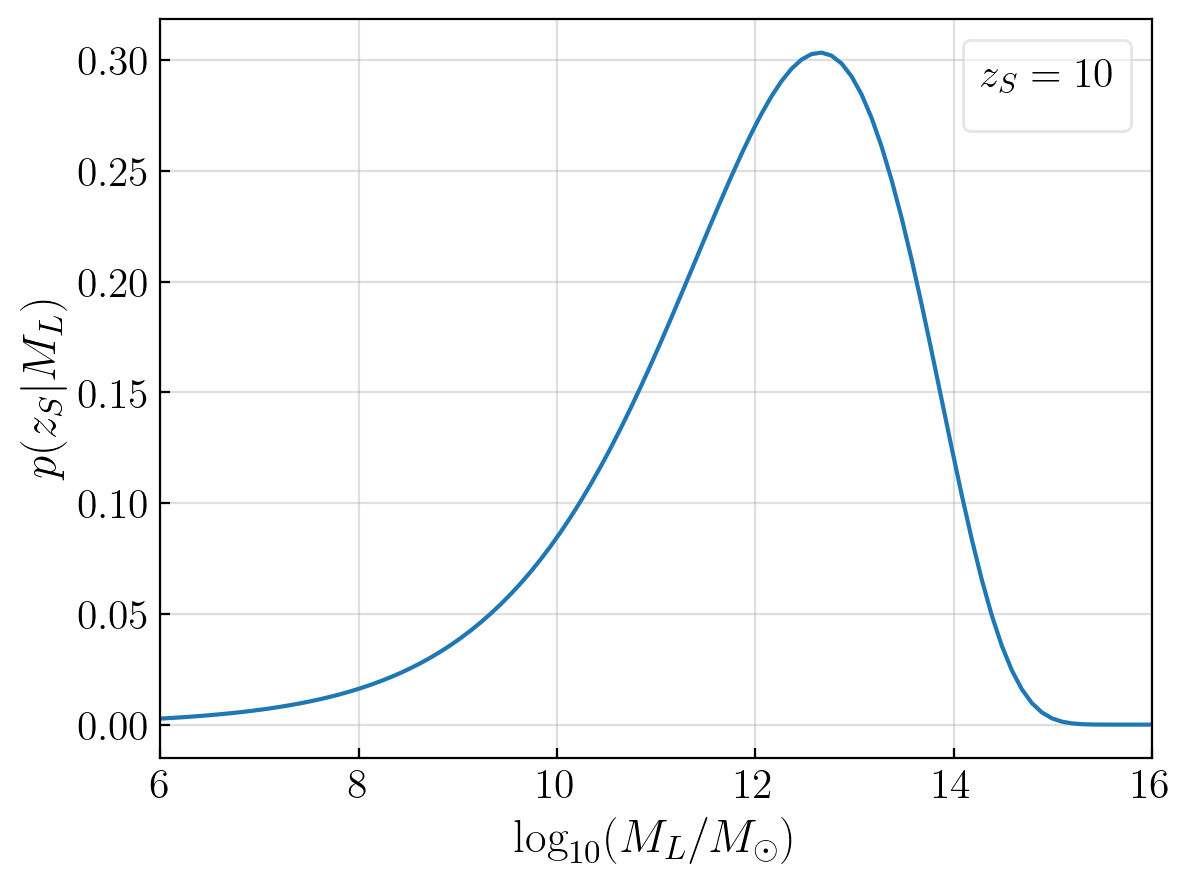

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


90% accumulated optical depth log10ML =  9.232323232323232 - 13.97979797979798


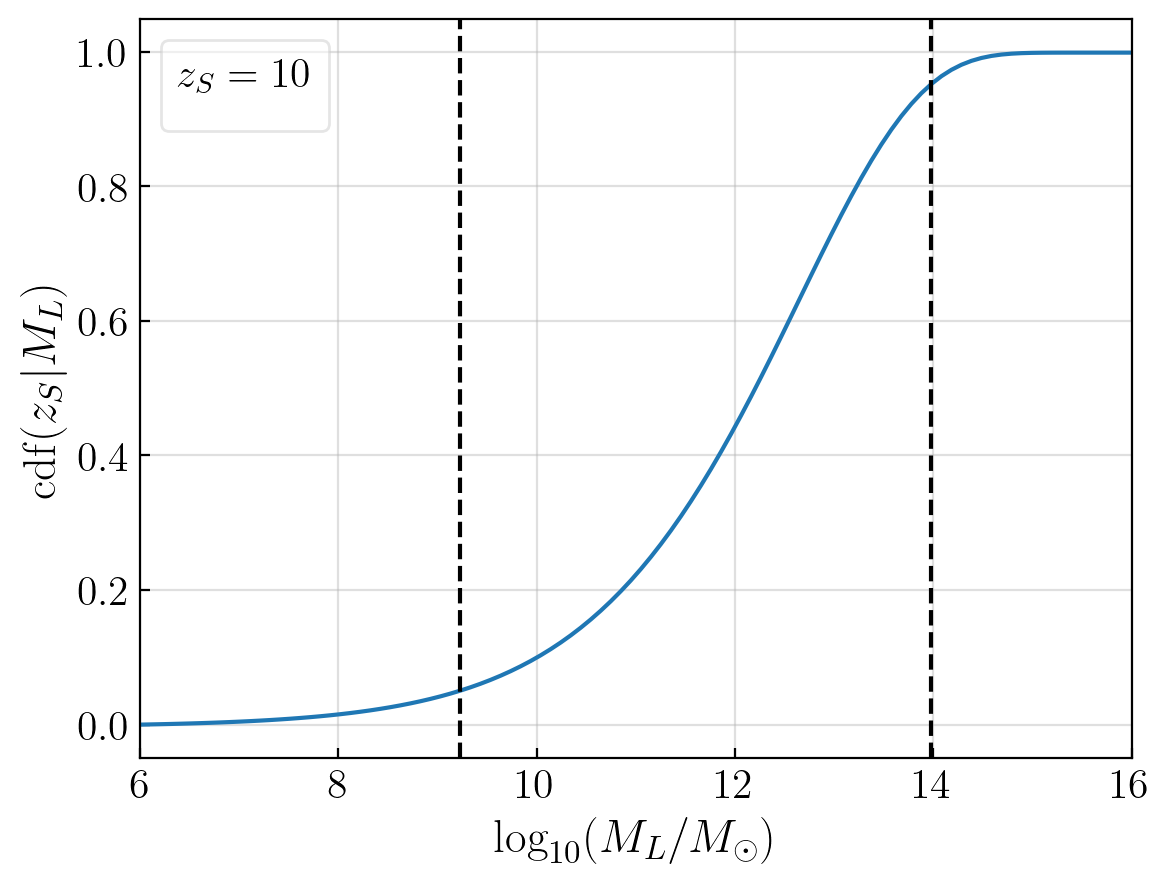

In [10]:
dtaudlog10M = trapezoid(np.log(10)*d2TAUdlnMdZ/tSIS_tot,zLs,axis=1)

plt.plot(np.log10(Ms),dtaudlog10M)


plt.ylabel(r'$p(z_S|M_L)$',fontsize=fontSZ)
plt.xlabel(r'$\log_{10}(M_L/M_\odot)$',fontsize=fontSZ)
#plt.xlabel(r'$10^3\mathrm{d}^2\tau/\mathrm{d}\ln M\mathrm{d}z$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title=r'$z_S=%s$' % z_S)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([np.log10(np.min(Ms)),np.log10(np.max(Ms))])
#plt.ylim([1e-4,5])
#plt.savefig(dir_out+'ddtaudlnMdz_contour_zS_%s.pdf' % z_S, bbox_inches='tight', transparent=True)
plt.show()

#CDF
cdf_M = cumtrapz(dtaudlog10M,np.log10(Ms),initial=0)
min90ML = np.log10(Ms)[np.argmin(abs(cdf_M-0.05))]
max90ML = np.log10(Ms)[np.argmin(abs(cdf_M-0.95))]
print('90% accumulated optical depth log10ML = ',min90ML,'-',max90ML)
plt.plot(np.log10(Ms),cdf_M)
plt.axvline(min90ML,color='k',ls='--')
plt.axvline(max90ML,color='k',ls='--')

plt.ylabel(r'$\mathrm{cdf}(z_S|M_L)$',fontsize=fontSZ)
plt.xlabel(r'$\log_{10}(M_L/M_\odot)$',fontsize=fontSZ)
#plt.xlabel(r'$10^3\mathrm{d}^2\tau/\mathrm{d}\ln M\mathrm{d}z$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title=r'$z_S=%s$' % z_S)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([np.log10(np.min(Ms)),np.log10(np.max(Ms))])
#plt.ylim([1e-4,5])
#plt.savefig(dir_out+'p_lens_ML.pdf', bbox_inches='tight', transparent=True)
plt.show()

Comparison with SIS + Schechter function

In [11]:
zs = np.logspace(-2,2,100)
H0 = cosmo.H(0).value
n = 8e-3 * np.power(H0/100,3) #Mpc^-3
sigmaS,alpha,beta = 161, 2.32, 2.67

tau at z= 15.000000000000004  is  0.00011682966143956857


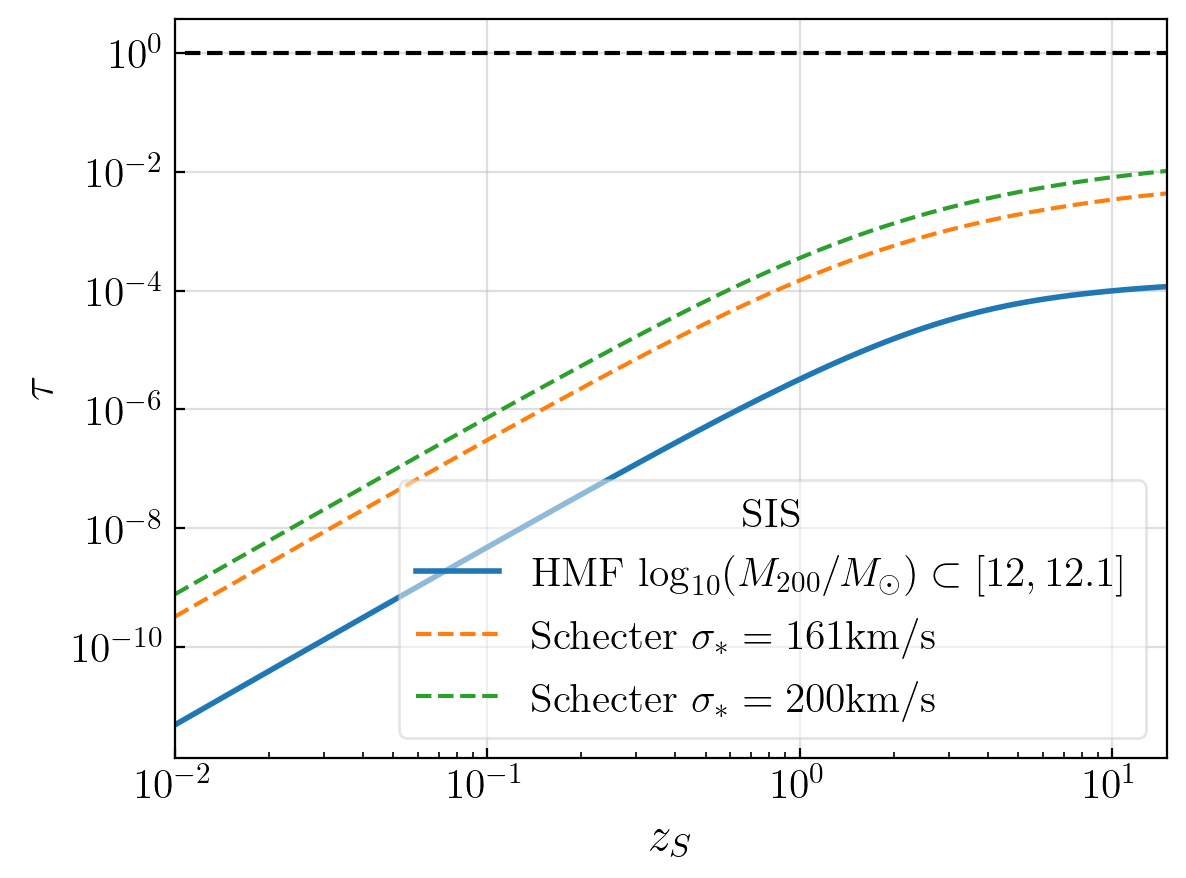

In [14]:
nzs = 100
z_Ss = np.logspace(-2,np.log10(15),100)

log10Mmin,log10Mmax, nMs = 12, 12.1, 1000
tSIS_tot = sistau.tau(z_Ss,log10Mmin,log10Mmax,nMs,nzs)
plt.loglog(z_Ss,tSIS_tot,lw=2,label=r'HMF $\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
print('tau at z=',z_Ss[-1],' is ',tSIS_tot[-1])

sigmaS_s = np.array([161,200])
for sigmaS in sigmaS_s:
    tau = sistau.tau_Schechter(zs,n,sigmaS,alpha,beta)
    plt.loglog(zs,tau,'--',label=r'Schecter $\sigma_*=%s$km/s' % sigmaS)

plt.axhline(1,min(z_Ss),max(z_Ss),ls='--',color='k')
plt.xlabel(r'$z_S$',fontsize=fontSZ)
plt.ylabel(r'$\tau$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title='SIS')#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(z_Ss),max(z_Ss)])
#plt.savefig(dir_out+'tau_zS_hmf_vs_schecter.pdf', bbox_inches='tight', transparent=True)
plt.show()